In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/NK_Hack/train_data.parquet'

In [4]:
df=pd.read_parquet(file_path,engine='auto')

In [5]:
df.head()

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [6]:
df

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,1746610196000000000,24358.8,2025-05-08,0.421949,0.393037,0.362155,0.330184,0.294492,0.256301,0.218157,...,-0.011905,0.000325,-3.540254e+05,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000,0.000000
178336,1746610197000000000,24359.6,2025-05-08,0.418388,0.390950,0.361965,0.329852,0.294419,0.256173,0.217796,...,0.028344,-0.002219,-2.081719e+05,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000,0.000000
178337,1746610198000000000,24358.5,2025-05-08,0.422143,0.394667,0.363130,0.329679,0.294183,0.255927,0.217671,...,-0.034540,0.006087,-2.078984e+05,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000,0.000000
178338,1746610199000000000,24358.5,2025-05-08,0.421115,0.394881,0.363162,0.329524,0.294258,0.255608,0.217636,...,-0.023918,-0.013291,-4.520567e+05,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-244659.375000,0.000000


In [7]:
df.describe()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,1.783400e+05,178340.000000,178340.000000,1.783400e+05,178340.000000,1.783400e+05,1.783400e+05,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,1.783400e+05,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,1.783400e+05,1.783400e+05
mean,1.746052e+18,24323.883938,0.423909,-3.220020e+07,0.349236,3.499773e+05,1.429192e+03,1.580317,0.195213,0.160997,...,0.000277,0.000014,-1.421471e+04,0.000588,-0.093444,0.000832,-1.877999e+04,-1.383081e+05,-4.700416e+03,-3.956062e+02
std,3.824884e+14,129.485600,2.178706,6.800128e+09,1.984786,7.389699e+07,5.550653e+05,402.799771,0.056097,0.032196,...,0.016701,0.008653,2.262233e+06,0.039787,2.346862,0.085648,4.314987e+06,1.873729e+07,7.563046e+05,1.225248e+06
min,1.745296e+18,23865.200000,0.186658,-1.435870e+12,0.036630,-1.244180e+05,-9.622650e+04,-0.045733,0.123994,0.074081,...,-0.275930,-0.144559,-1.019237e+08,-0.625017,-16.815711,-2.586113,-2.726196e+08,-4.113054e+08,-8.211573e+07,-3.067265e+08
25%,1.745818e+18,24280.600000,0.256790,2.417285e-01,0.226604,2.107440e-01,1.925507e-01,0.173014,0.161050,0.143029,...,-0.007785,-0.004317,-6.453953e+05,-0.018780,-1.098059,-0.022254,-7.875973e+05,-5.170499e+06,-1.279849e+05,-0.000000e+00
50%,1.745995e+18,24347.000000,0.297625,2.770240e-01,0.256366,2.354450e-01,2.165680e-01,0.196701,0.174057,0.157880,...,0.000258,0.000012,0.000000e+00,0.000566,-0.006216,0.000048,4.336592e+03,-2.000000e-06,0.000000e+00,0.000000e+00
75%,1.746432e+18,24385.200000,0.404716,3.753433e-01,0.346050,3.155980e-01,2.813773e-01,0.246242,0.210348,0.168074,...,0.008461,0.004381,6.062090e+05,0.020147,0.965078,0.023691,8.029313e+05,5.008932e+06,1.150824e+05,0.000000e+00
max,1.746610e+18,24668.500000,912.411000,7.904570e+08,833.879000,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,...,0.402689,0.191822,4.357080e+07,0.841955,22.124694,2.564958,2.498199e+08,6.597803e+08,2.846932e+07,1.981789e+08


In [8]:
df.shape

(178340, 97)

In [9]:
file_path_test='/content/drive/MyDrive/NK_Hack/test_data.parquet'
test_df=pd.read_parquet(file_path_test,engine='auto')
train_cols = df.columns
test_cols = test_df.columns
iv_cols = [col for col in df.columns if "_iv_" in col]
# cols involving iv data
test_iv_cols = [col for col in test_df.columns if "_iv_" in col]
train_call_iv_cols = [col for col in train_cols if "call_iv_" in col]
train_put_iv_cols = [col for col in train_cols if "put_iv_" in col]
test_call_iv_cols = [col for col in test_cols if "call_iv_" in col]
test_put_iv_cols = [col for col in test_cols if "put_iv_" in col]
# cols involving iv data
# Columns in train but not in test, in original train order
train_spec_cols = [col for col in train_cols if col not in test_cols]
train_spec_call_iv_cols=[col for col in train_spec_cols if "call_iv_" in col]
train_spec_put_iv_cols=[col for col in train_spec_cols if "put_iv_" in col]
# Columns in test but not in train, in original test order
test_spec_cols = [col for col in test_cols if col not in train_cols]
test_spec_call_iv_cols=[col for col in test_spec_cols if "call_iv_" in col]
test_spec_put_iv_cols=[col for col in test_spec_cols if "put_iv_" in col]
common_call_iv_cols = [col for col in train_call_iv_cols if col in test_call_iv_cols]
common_put_iv_cols = [col for col in train_put_iv_cols if col in test_put_iv_cols]

In [10]:
df.shape

(178340, 97)

In [11]:
iv_cols = [col for col in df.columns if "_iv_" in col]
# Filter the DataFrame to keep only rows where all _iv_ columns are between 0 and 2
df_filtered = df[(df[iv_cols] >= 0.05).all(axis=1) & (df[iv_cols] <= 0.7).all(axis=1)]

# You can now work with df_filtered which contains the data that satisfies the condition
# print the shape of the filtered dataframe to see how many rows remain
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")

# Optionally, you can replace the original dataframe with the filtered one
# df = df_filtered

Original shape: (178340, 97)
Filtered shape: (138577, 97)


In [12]:
df_filtered

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
19959,1745553600000000000,24335.7,2025-04-30,0.206374,0.198248,0.190741,0.182519,0.175120,0.168219,0.161882,...,0.041964,0.005998,-5.531107e+05,-0.030974,-7.244860,-0.021866,-7.579856e+05,-3.332750e+06,-1.906523e+05,-0.0
19960,1745553601000000000,24329.6,2025-04-30,0.205937,0.197908,0.190014,0.182705,0.175091,0.168580,0.161722,...,-0.043623,0.006194,-3.409508e+06,0.015008,-7.915080,0.059635,1.468490e+06,3.101024e+06,-2.222666e+06,-0.0
19961,1745553602000000000,24329.6,2025-04-30,0.206817,0.197678,0.191852,0.183050,0.175499,0.168531,0.162125,...,-0.024357,-0.009549,3.633648e+06,-0.015292,-5.849228,0.117568,-3.262815e+05,6.592979e+06,4.598697e+06,0.0
19962,1745553603000000000,24321.9,2025-04-30,0.205202,0.198693,0.190968,0.182428,0.175194,0.168518,0.161966,...,-0.018481,0.001576,5.747436e+06,-0.089666,0.787469,-0.037160,-2.928887e+05,1.669522e+08,2.770464e+06,-0.0
19963,1745553604000000000,24322.0,2025-04-30,0.206339,0.198076,0.190866,0.182062,0.175398,0.168478,0.161900,...,0.007857,-0.003771,5.327516e+06,-0.080826,1.167287,-0.029494,2.479100e+06,6.446412e+07,1.568396e+06,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,1746610196000000000,24358.8,2025-05-08,0.421949,0.393037,0.362155,0.330184,0.294492,0.256301,0.218157,...,-0.011905,0.000325,-3.540254e+05,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000e+00,0.0
178336,1746610197000000000,24359.6,2025-05-08,0.418388,0.390950,0.361965,0.329852,0.294419,0.256173,0.217796,...,0.028344,-0.002219,-2.081719e+05,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000e+00,0.0
178337,1746610198000000000,24358.5,2025-05-08,0.422143,0.394667,0.363130,0.329679,0.294183,0.255927,0.217671,...,-0.034540,0.006087,-2.078984e+05,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000e+00,0.0
178338,1746610199000000000,24358.5,2025-05-08,0.421115,0.394881,0.363162,0.329524,0.294258,0.255608,0.217636,...,-0.023918,-0.013291,-4.520567e+05,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-2.446594e+05,0.0


In [13]:
scaler = StandardScaler()

In [14]:
df

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,1746610196000000000,24358.8,2025-05-08,0.421949,0.393037,0.362155,0.330184,0.294492,0.256301,0.218157,...,-0.011905,0.000325,-3.540254e+05,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000,0.000000
178336,1746610197000000000,24359.6,2025-05-08,0.418388,0.390950,0.361965,0.329852,0.294419,0.256173,0.217796,...,0.028344,-0.002219,-2.081719e+05,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000,0.000000
178337,1746610198000000000,24358.5,2025-05-08,0.422143,0.394667,0.363130,0.329679,0.294183,0.255927,0.217671,...,-0.034540,0.006087,-2.078984e+05,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000,0.000000
178338,1746610199000000000,24358.5,2025-05-08,0.421115,0.394881,0.363162,0.329524,0.294258,0.255608,0.217636,...,-0.023918,-0.013291,-4.520567e+05,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-244659.375000,0.000000


In [15]:
def preprocess(ds_frame):
  drop_worthy=['timestamp']
  filtered_df=ds_frame.drop(drop_worthy,axis=1)
  cols_to_scale = [col for col in filtered_df.columns if 'X' in col]

# Apply StandardScaler to the identified columns
  filtered_df[cols_to_scale] = scaler.fit_transform(filtered_df[cols_to_scale])
  return filtered_df

In [16]:
df_ready=preprocess(df_filtered)
df_ready.head()

,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
19959,24335.7,2025-04-30,0.206374,0.198248,0.190741,0.182519,0.175120,0.168219,0.161882,0.156577,...,2.336909,0.624647,-0.221743,-0.748793,-2.789494,-0.249494,-0.151016,-0.160894,-0.225749,0.000307
19960,24329.6,2025-04-30,0.205937,0.197908,0.190014,0.182705,0.175091,0.168580,0.161722,0.157152,...,-2.473049,0.645178,-1.406230,0.335245,-3.051003,0.623521,0.319457,0.160132,-2.719889,0.000307
19961,24329.6,2025-04-30,0.206817,0.197678,0.191852,0.183050,0.175499,0.168531,0.162125,0.156902,...,-1.390307,-1.003913,1.514416,-0.379085,-2.244940,1.244083,-0.059793,0.334370,5.652808,0.000307
19962,24321.9,2025-04-30,0.205202,0.198693,0.190968,0.182428,0.175194,0.168518,0.161966,0.156790,...,-1.060078,0.161439,2.390959,-2.132473,0.344595,-0.413319,-0.052737,8.335803,3.408793,0.000307
19963,24322.0,2025-04-30,0.206339,0.198076,0.190866,0.182062,0.175398,0.168478,0.161900,0.156876,...,0.420108,-0.398663,2.216827,-1.924067,0.492794,-0.331203,0.533007,3.221962,1.933347,0.000307


In [17]:
df_ready.drop('expiry',axis=1,inplace=True)
df_ready.head()

,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
19959,24335.7,0.206374,0.198248,0.190741,0.182519,0.175120,0.168219,0.161882,0.156577,0.151857,...,2.336909,0.624647,-0.221743,-0.748793,-2.789494,-0.249494,-0.151016,-0.160894,-0.225749,0.000307
19960,24329.6,0.205937,0.197908,0.190014,0.182705,0.175091,0.168580,0.161722,0.157152,0.152069,...,-2.473049,0.645178,-1.406230,0.335245,-3.051003,0.623521,0.319457,0.160132,-2.719889,0.000307
19961,24329.6,0.206817,0.197678,0.191852,0.183050,0.175499,0.168531,0.162125,0.156902,0.151961,...,-1.390307,-1.003913,1.514416,-0.379085,-2.244940,1.244083,-0.059793,0.334370,5.652808,0.000307
19962,24321.9,0.205202,0.198693,0.190968,0.182428,0.175194,0.168518,0.161966,0.156790,0.151924,...,-1.060078,0.161439,2.390959,-2.132473,0.344595,-0.413319,-0.052737,8.335803,3.408793,0.000307
19963,24322.0,0.206339,0.198076,0.190866,0.182062,0.175398,0.168478,0.161900,0.156876,0.152012,...,0.420108,-0.398663,2.216827,-1.924067,0.492794,-0.331203,0.533007,3.221962,1.933347,0.000307


In [19]:
df_fire=preprocess(test_df)
df_fire.head()

,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,0.222997,...,0.663962,0.092911,-0.024374,-0.063603,-0.392946,0.046047,0.398702,-0.004258,0.006258,-0.559490
1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,NaN,...,0.580920,0.161123,-0.041717,-0.235256,-0.066972,-0.053319,-0.755161,-0.370345,-0.672751,0.492133
2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.20458,0.194604,NaN,NaN,...,0.073646,-1.369281,0.118565,0.381197,0.849529,1.793902,0.509732,-0.004258,-0.023866,-0.275940
3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.18619,NaN,NaN,NaN,...,-0.967149,-0.905692,-0.565335,0.031009,0.265579,-0.064622,-1.308013,-0.434649,-1.670228,-1.951433
4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,NaN,...,-1.925825,-0.310247,-0.051909,-1.557104,0.109752,-0.534139,0.275949,0.053375,1.608930,0.323592


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [21]:
lr=LinearRegression()

In [22]:
df_fire[test_spec_cols]

,call_iv_26100,call_iv_26200,call_iv_26300,call_iv_26400,call_iv_26500,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,NaN,0.416480,0.437552,NaN,0.482652,NaN,0.250422,NaN,NaN,0.282229
1,NaN,NaN,NaN,0.440725,NaN,0.249402,NaN,NaN,NaN,NaN
2,NaN,0.290094,NaN,NaN,0.336695,NaN,0.190750,NaN,NaN,NaN
3,0.279118,0.293905,NaN,NaN,0.342153,0.172032,NaN,NaN,NaN,0.206107
4,0.233272,0.244520,NaN,NaN,0.282333,0.176000,NaN,NaN,0.182314,NaN
...,...,...,...,...,...,...,...,...,...,...
12060,NaN,0.227919,0.238638,NaN,0.263555,NaN,0.176356,0.177716,NaN,NaN
12061,0.214229,0.222383,NaN,NaN,NaN,0.177923,NaN,0.180254,NaN,NaN
12062,0.274980,NaN,0.304301,0.320435,NaN,NaN,NaN,NaN,0.201360,0.209940
12063,NaN,NaN,0.228607,NaN,NaN,NaN,NaN,0.178806,NaN,NaN


In [23]:
from sklearn.impute import SimpleImputer,KNNImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='mean')
knn_imputer=KNNImputer(n_neighbors=5)

In [24]:
from scipy.interpolate import UnivariateSpline

In [25]:
def extract_strike(col):
    return int(col.split("_")[-1])

strike_map_call = {col: extract_strike(col) for col in test_call_iv_cols}

In [26]:
strike_map_call_train={col: extract_strike(col) for col in train_call_iv_cols}

In [27]:
strike_map_put_train={col: extract_strike(col) for col in train_put_iv_cols}

In [28]:
df_ready_export=df_ready.copy()

In [29]:
df_ready_export.shape

(138577, 95)

In [30]:
for col in train_call_iv_cols:
    strike_call = strike_map_call_train[col]
    df_ready_export[f"logm_{col}"] = np.log(strike_call / df_ready_export["underlying"])

In [31]:
for col in train_put_iv_cols:
    strike_put = strike_map_put_train[col]
    df_ready_export[f"logm_{col}"] = np.log(strike_put / df_ready_export["underlying"])

In [32]:
df_ready_export.shape

(138577, 147)

In [33]:
df_ready_export.to_csv('df_ready_export.csv',index=False)

In [34]:
adshzj=pd.read_csv('df_ready_export.csv')
adshzj.shape

(138577, 147)

In [37]:
for col in test_call_iv_cols:
    strike_call = strike_map_call[col]
    df_fire[f"logm_{col}"] = np.log(strike_call / df_fire["underlying"])



# Optional: Smooth per row using spline
K_map_call = {col: strike_map_call[col] for col in test_call_iv_cols}
K_array_call = np.array([K_map_call[col] for col in test_call_iv_cols])

In [38]:
strike_map_put = {col: extract_strike(col) for col in test_put_iv_cols}
for col in test_put_iv_cols:
    strike_put = strike_map_put[col]
    df_fire[f"logm_{col}"] = np.log(df_fire["underlying"] / strike_put)

K_map_put = {col: strike_map_put[col] for col in test_put_iv_cols}
K_array_put = np.array([K_map_put[col] for col in test_put_iv_cols])

In [39]:
from scipy.interpolate import UnivariateSpline
import numpy as np

# Ensure proper index
df_fire = df_fire.reset_index(drop=True)

for i in range(len(df_fire)):
    row = df_fire.iloc[i]
    logm_vals = []
    iv_vals = []

    for col in test_call_iv_cols:
        if not pd.isna(row[col]):
            logm = row[f"logm_{col}"]
            iv = row[col]
            logm_vals.append(logm)
            iv_vals.append(iv)

    if len(logm_vals) < 4:
        continue

    # Fit the spline model
    spline = UnivariateSpline(logm_vals, iv_vals, k=3, s=0.001)

    # Fill the missing values
    for col in test_call_iv_cols:
        if pd.isna(df_fire.loc[i, col]):
            logm = df_fire.loc[i, f"logm_{col}"]
            df_fire.loc[i, col] = spline(logm)


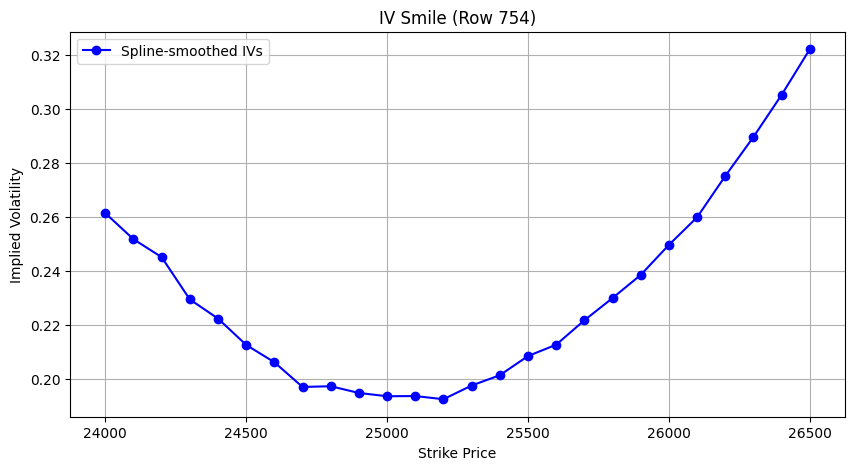

In [40]:
import matplotlib.pyplot as plt

def plot_iv_smile(df, row_idx):
    row = df.iloc[row_idx]
    strikes = []
    ivs = []

    for col in test_call_iv_cols:
        strike = strike_map_call[col]
        iv = row[col]
        if not pd.isna(iv):
            strikes.append(strike)
            ivs.append(iv)

    plt.figure(figsize=(10, 5))
    plt.plot(strikes, ivs, 'bo-', label="Spline-smoothed IVs")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility")
    plt.title(f"IV Smile (Row {row_idx})")
    plt.grid()
    plt.legend()
    plt.show()

# Example: Plot first row
plot_iv_smile(df_fire, 754)


In [41]:
df_fire[test_call_iv_cols].isna().sum().sort_values(ascending=False)

,0
call_iv_24000,14
call_iv_25100,14
call_iv_26000,14
call_iv_25900,14
call_iv_25700,14
call_iv_26500,14
call_iv_24500,14
call_iv_24200,14
call_iv_26400,13
call_iv_24900,13


In [42]:
df_fire[test_call_iv_cols]

,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,call_iv_24900,...,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000,call_iv_26100,call_iv_26200,call_iv_26300,call_iv_26400,call_iv_26500
0,0.280939,0.267765,0.255222,0.245162,0.242149,0.232119,0.232439,0.227925,0.222997,0.227966,...,0.300904,0.316764,0.333915,0.352288,0.371818,0.392442,0.416480,0.437552,0.460257,0.482652
1,0.270276,0.262417,0.258893,0.245393,0.239639,0.235660,0.233548,0.232844,0.233917,0.229917,...,0.296464,0.310430,0.325637,0.342047,0.359627,0.378343,0.398160,0.419045,0.440725,0.463892
2,0.274325,0.251731,0.237474,0.223021,0.214869,0.204580,0.194604,0.188791,0.185534,0.180668,...,0.218625,0.228626,0.243069,0.251491,0.264176,0.277581,0.290094,0.306214,0.321280,0.336695
3,0.241888,0.229581,0.220505,0.204832,0.198602,0.186190,0.183164,0.179711,0.178001,0.177953,...,0.217618,0.230049,0.239615,0.252047,0.266470,0.279118,0.293905,0.309839,0.325998,0.342153
4,0.235328,0.228981,0.222983,0.214126,0.204027,0.197547,0.192603,0.187439,0.183841,0.181234,...,0.193893,0.197588,0.204464,0.212450,0.221556,0.233272,0.244520,0.255687,0.269365,0.282333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,0.245710,0.233427,0.222660,0.212921,0.204348,0.196921,0.190622,0.186856,0.181334,0.178101,...,0.185786,0.190752,0.198679,0.203452,0.211156,0.219745,0.227919,0.238638,0.250673,0.263555
12061,0.250609,0.236380,0.226972,0.215887,0.207128,0.200906,0.193655,0.188478,0.184616,0.181842,...,0.188597,0.193188,0.197505,0.202897,0.209741,0.214229,0.222383,0.229744,0.237575,0.245777
12062,0.256475,0.243817,0.234267,0.221270,0.204615,0.196018,0.189530,0.185088,0.179760,0.177229,...,0.220102,0.227861,0.240654,0.250690,0.263324,0.274980,0.290633,0.304301,0.320435,0.335556
12063,0.252985,0.239825,0.228549,0.218303,0.209316,0.201548,0.194960,0.190833,0.185851,0.181560,...,0.186324,0.189864,0.194639,0.200150,0.206824,0.213262,0.220805,0.228607,0.237730,0.247058


In [43]:
df_fire_test_call_spline=df_fire[test_call_iv_cols]

from sklearn.impute import KNNImputer
import pandas as pd



# Transpose to treat rows as features (so KNN will work across columns)
df_fire_test_call_spline_T = df_fire_test_call_spline.T

# KNN Imputer (now imputes across original columns)
knn_imputer = KNNImputer(n_neighbors=3)
df_fire_copy_imputed_T = pd.DataFrame(
    knn_imputer.fit_transform(df_fire_test_call_spline_T),
    index=df_fire_test_call_spline_T.index,
    columns=df_fire_test_call_spline_T.columns
)
# Transpose back to original shape — this was the bug
df_fire_test_call_spline = df_fire_copy_imputed_T.T

# Preview
df_fire_test_call_spline.head()

,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,call_iv_24900,...,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000,call_iv_26100,call_iv_26200,call_iv_26300,call_iv_26400,call_iv_26500
0,0.280939,0.267765,0.255222,0.245162,0.242149,0.232119,0.232439,0.227925,0.222997,0.227966,...,0.300904,0.316764,0.333915,0.352288,0.371818,0.392442,0.416480,0.437552,0.460257,0.482652
1,0.270276,0.262417,0.258893,0.245393,0.239639,0.235660,0.233548,0.232844,0.233917,0.229917,...,0.296464,0.310430,0.325637,0.342047,0.359627,0.378343,0.398160,0.419045,0.440725,0.463892
2,0.274325,0.251731,0.237474,0.223021,0.214869,0.204580,0.194604,0.188791,0.185534,0.180668,...,0.218625,0.228626,0.243069,0.251491,0.264176,0.277581,0.290094,0.306214,0.321280,0.336695
3,0.241888,0.229581,0.220505,0.204832,0.198602,0.186190,0.183164,0.179711,0.178001,0.177953,...,0.217618,0.230049,0.239615,0.252047,0.266470,0.279118,0.293905,0.309839,0.325998,0.342153
4,0.235328,0.228981,0.222983,0.214126,0.204027,0.197547,0.192603,0.187439,0.183841,0.181234,...,0.193893,0.197588,0.204464,0.212450,0.221556,0.233272,0.244520,0.255687,0.269365,0.282333


In [44]:
for i in range(len(df_fire)):
    row = df_fire.iloc[i]
    logm_vals = []
    iv_vals = []

    for col in test_put_iv_cols:
        if not pd.isna(row[col]):
            logm = row[f"logm_{col}"]
            iv = row[col]
            logm_vals.append(logm)
            iv_vals.append(iv)

    if len(logm_vals) < 4:
        continue

    # Sort before fitting
    sorted_pairs = sorted(zip(logm_vals, iv_vals))
    logm_vals_sorted, iv_vals_sorted = zip(*sorted_pairs)

    # Fit spline
    spline = UnivariateSpline(logm_vals_sorted, iv_vals_sorted, k=3, s=0.001)

    # Fill missing
    for col in test_put_iv_cols:
        if pd.isna(df_fire.loc[i, col]):
            logm = row[f"logm_{col}"]
            df_fire.loc[i, col] = spline(logm)


In [45]:
df_fire[test_put_iv_cols]

,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300,put_iv_23400,put_iv_23500,put_iv_23600,put_iv_23700,put_iv_23800,put_iv_23900,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0.495740,0.467925,0.441417,0.416262,0.392468,0.370186,0.349352,0.330041,0.312295,0.296150,...,0.232334,0.228931,0.228760,0.227301,0.234169,0.239927,0.250422,0.257368,0.269163,0.282229
1,0.484878,0.460731,0.436875,0.414587,0.395512,0.376950,0.354323,0.336365,0.318686,0.302259,...,0.233170,0.228209,0.231790,0.234718,0.240197,0.249402,0.259205,0.272926,0.289583,0.309266
2,0.392426,0.377035,0.364992,0.343531,0.338927,0.325262,0.311404,0.297520,0.283773,0.273906,...,0.194612,0.188052,0.186852,0.184252,0.181346,0.184564,0.190750,0.192985,0.200511,0.210390
3,0.392934,0.376389,0.361706,0.346440,0.324530,0.314919,0.297898,0.283307,0.270445,0.253014,...,0.176091,0.166394,0.161561,0.165879,0.166509,0.172032,0.174569,0.182239,0.192490,0.206107
4,0.323171,0.317457,0.310791,0.303317,0.295748,0.286507,0.277444,0.268119,0.257080,0.248710,...,0.192461,0.187044,0.182609,0.177920,0.177069,0.176000,0.176586,0.178464,0.182314,0.186886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,0.358865,0.346365,0.338060,0.327514,0.315617,0.305161,0.293608,0.281999,0.270249,0.259744,...,0.193408,0.187334,0.182383,0.177270,0.176223,0.175192,0.176356,0.177716,0.181325,0.186717
12061,2.213869,1.936351,1.686186,1.461747,1.261445,1.083729,0.927084,0.790032,0.671128,0.568961,...,0.210701,0.195463,0.185665,0.180196,0.177969,0.177923,0.179022,0.180254,0.180631,0.179189
12062,0.382943,0.378844,0.360138,0.354073,0.341922,0.328913,0.315282,0.301257,0.287062,0.272486,...,0.192306,0.185871,0.179666,0.176916,0.177577,0.179145,0.183142,0.189722,0.201360,0.209940
12063,0.363377,0.352412,0.343497,0.330890,0.322749,0.311835,0.300148,0.288864,0.277408,0.266058,...,0.198962,0.190933,0.186172,0.182504,0.179358,0.177531,0.177107,0.178806,0.180797,0.185072


In [46]:
df_fire[test_put_iv_cols].iloc[12061]

,12061
put_iv_23000,2.213869
put_iv_23100,1.936351
put_iv_23200,1.686186
put_iv_23300,1.461747
put_iv_23400,1.261445
put_iv_23500,1.083729
put_iv_23600,0.927084
put_iv_23700,0.790032
put_iv_23800,0.671128
put_iv_23900,0.568961


In [47]:
df_fire[test_iv_cols].isna().sum().sort_values(ascending=False)

,0
put_iv_25400,23
put_iv_23500,23
put_iv_24800,23
put_iv_23000,22
put_iv_23100,22
put_iv_23600,22
put_iv_23700,22
put_iv_24100,22
put_iv_24200,22
put_iv_24400,21


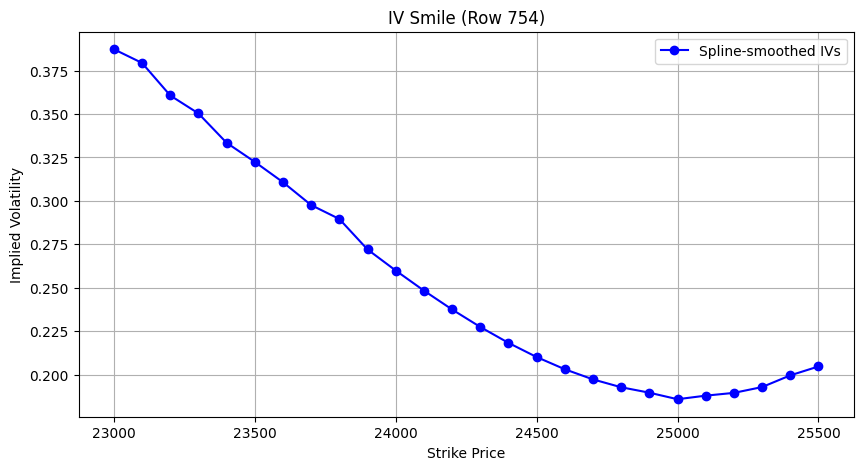

In [48]:
import matplotlib.pyplot as plt

def plot_iv_smile_put(df, row_idx):
    row = df.iloc[row_idx]
    strikes = []
    ivs = []

    for col in test_put_iv_cols:
        strike = strike_map_put[col]
        iv = row[col]
        if not pd.isna(iv):
            strikes.append(strike)
            ivs.append(iv)

    plt.figure(figsize=(10, 5))
    plt.plot(strikes, ivs, 'bo-', label="Spline-smoothed IVs")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility")
    plt.title(f"IV Smile (Row {row_idx})")
    plt.grid()
    plt.legend()
    plt.show()

# Example: Plot first row
plot_iv_smile_put(df_fire, 754)


In [49]:
df_fire_test_put_spline=df_fire[test_put_iv_cols]


In [50]:
df_fire_test_put_spline.iloc[8186]=df_fire_test_put_spline.iloc[8187].fillna(method='ffill').fillna(method='bfill')
df_fire_test_put_spline.iloc[8186]

<ipython-input-50-e144460a6c70>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fire_test_put_spline.iloc[8186]=df_fire_test_put_spline.iloc[8187].fillna(method='ffill').fillna(method='bfill')
<ipython-input-50-e144460a6c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_test_put_spline.iloc[8186]=df_fire_test_put_spline.iloc[8187].fillna(method='ffill').fillna(method='bfill')


,8186
put_iv_23000,0.356279
put_iv_23100,0.345394
put_iv_23200,0.335167
put_iv_23300,0.324365
put_iv_23400,0.309935
put_iv_23500,0.301560
put_iv_23600,0.289814
put_iv_23700,0.278005
put_iv_23800,0.265801
put_iv_23900,0.254672


In [51]:


from sklearn.impute import KNNImputer
import pandas as pd



# Transpose to treat rows as features (so KNN will work across columns)
df_fire_test_put_spline_T = df_fire_test_put_spline.T

# KNN Imputer (now imputes across original columns)
knn_imputer = KNNImputer(n_neighbors=3)
df_fire_copy_imputed_T = pd.DataFrame(
    knn_imputer.fit_transform(df_fire_test_put_spline_T),
    index=df_fire_test_put_spline_T.index,
    columns=df_fire_test_put_spline_T.columns
)
# Transpose back to original shape — this was the bug
df_fire_test_put_spline_T = df_fire_copy_imputed_T.T

# Preview
df_fire_test_put_spline_T.head()

,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300,put_iv_23400,put_iv_23500,put_iv_23600,put_iv_23700,put_iv_23800,put_iv_23900,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0.495740,0.467925,0.441417,0.416262,0.392468,0.370186,0.349352,0.330041,0.312295,0.296150,...,0.232334,0.228931,0.228760,0.227301,0.234169,0.239927,0.250422,0.257368,0.269163,0.282229
1,0.484878,0.460731,0.436875,0.414587,0.395512,0.376950,0.354323,0.336365,0.318686,0.302259,...,0.233170,0.228209,0.231790,0.234718,0.240197,0.249402,0.259205,0.272926,0.289583,0.309266
2,0.392426,0.377035,0.364992,0.343531,0.338927,0.325262,0.311404,0.297520,0.283773,0.273906,...,0.194612,0.188052,0.186852,0.184252,0.181346,0.184564,0.190750,0.192985,0.200511,0.210390
3,0.392934,0.376389,0.361706,0.346440,0.324530,0.314919,0.297898,0.283307,0.270445,0.253014,...,0.176091,0.166394,0.161561,0.165879,0.166509,0.172032,0.174569,0.182239,0.192490,0.206107
4,0.323171,0.317457,0.310791,0.303317,0.295748,0.286507,0.277444,0.268119,0.257080,0.248710,...,0.192461,0.187044,0.182609,0.177920,0.177069,0.176000,0.176586,0.178464,0.182314,0.186886


In [52]:
all_nan_cols = df_fire_test_put_spline_T.columns[df_fire_test_put_spline_T.isna().all()]
print("All NaN columns:", all_nan_cols)


All NaN columns: Index([], dtype='object')


In [53]:
submission_7=pd.concat([test_df['timestamp'],df_fire[test_iv_cols]],axis=1)
submission_7.head()

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.267765,0.255222,0.245162,0.242149,0.232119,0.232439,0.227925,0.222997,...,0.232334,0.228931,0.228760,0.227301,0.234169,0.239927,0.250422,0.257368,0.269163,0.282229
1,1,0.270276,0.262417,0.258893,0.245393,0.239639,0.235660,0.233548,0.232844,0.233917,...,0.233170,0.228209,0.231790,0.234718,0.240197,0.249402,0.259205,0.272926,0.289583,0.309266
2,2,0.274325,0.251731,0.237474,0.223021,0.214869,0.204580,0.194604,0.188791,0.185534,...,0.194612,0.188052,0.186852,0.184252,0.181346,0.184564,0.190750,0.192985,0.200511,0.210390
3,3,0.241888,0.229581,0.220505,0.204832,0.198602,0.186190,0.183164,0.179711,0.178001,...,0.176091,0.166394,0.161561,0.165879,0.166509,0.172032,0.174569,0.182239,0.192490,0.206107
4,4,0.235328,0.228981,0.222983,0.214126,0.204027,0.197547,0.192603,0.187439,0.183841,...,0.192461,0.187044,0.182609,0.177920,0.177069,0.176000,0.176586,0.178464,0.182314,0.186886


In [54]:
test_df

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,...,0.006587,0.002826,-1.737617e+05,-0.009541,-0.017831,0.000264,2.032521e+06,1.000000e-06,-0.077238,-5.362742e+06
1,1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,...,0.005777,0.004588,-3.195086e+05,-0.024106,-0.004696,-0.000158,-4.529075e+06,-1.619022e+06,-0.956928,4.624907e+06
2,2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.204580,0.194604,NaN,...,0.000829,-0.034944,1.027525e+06,0.028201,0.032234,0.007687,2.663908e+06,0.000000e+00,-0.116264,-2.669766e+06
3,3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.186190,NaN,NaN,...,-0.009323,-0.022969,-4.720074e+06,-0.001513,0.008704,-0.000206,-7.672936e+06,-1.903406e+06,-2.249208,-1.858254e+07
4,4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,...,-0.018674,-0.007588,-4.051681e+05,-0.136267,0.002425,-0.002200,1.334469e+06,2.548789e+05,1.999104,3.024212e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,24992.1,NaN,0.233427,NaN,NaN,NaN,NaN,NaN,0.186856,...,-0.010750,0.006911,-1.497117e+05,-0.059785,-0.014518,-0.006756,-7.822864e+06,2.149933e+05,-2.069687,-6.738094e+06
12061,12061,25020.3,NaN,0.236380,0.226972,NaN,NaN,0.200906,0.193655,NaN,...,-0.000224,0.024468,-1.176289e+06,-0.016344,-0.034368,0.001133,-2.392407e+06,-1.176289e+06,-2.023157,6.031379e+03
12062,12062,24897.2,0.256475,0.243817,0.234267,0.221270,NaN,NaN,NaN,0.185088,...,-0.009009,0.006057,1.920387e+06,-0.016521,-0.013230,-0.009278,2.287786e+06,0.000000e+00,1.751653,-3.621450e+06
12063,12063,25035.6,NaN,0.239825,NaN,NaN,NaN,NaN,NaN,0.190833,...,0.001625,0.063421,6.357844e+05,0.077753,0.068983,0.000112,8.723009e+06,2.352188e+05,1.502687,-1.177899e+06


In [55]:
df_fire.isna().sum().sort_values(ascending=False)

,0
put_iv_25400,23
put_iv_23500,23
put_iv_24800,23
put_iv_23100,22
put_iv_23000,22
...,...
X28,0
X27,0
X26,0
X25,0


In [56]:
submission_7.isna().sum().sort_values(ascending=False)

,0
put_iv_24800,23
put_iv_25400,23
put_iv_23500,23
put_iv_23100,22
put_iv_24100,22
put_iv_24200,22
put_iv_23000,22
put_iv_23600,22
put_iv_23700,22
put_iv_24900,21


In [57]:
submission_7.to_csv('submission_7_1.csv',index=False)

In [58]:
submission_7.isna().sum().sort_values(ascending=False)

,0
put_iv_24800,23
put_iv_25400,23
put_iv_23500,23
put_iv_23100,22
put_iv_24100,22
put_iv_24200,22
put_iv_23000,22
put_iv_23600,22
put_iv_23700,22
put_iv_24900,21


In [59]:
# ffill
submission_7[test_iv_cols] = submission_7[test_iv_cols].fillna(method='ffill').fillna(method='bfill')

<ipython-input-59-4cf215f1b0fa>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  submission_7[test_iv_cols] = submission_7[test_iv_cols].fillna(method='ffill').fillna(method='bfill')


In [60]:
submission_7

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.267765,0.255222,0.245162,0.242149,0.232119,0.232439,0.227925,0.222997,...,0.232334,0.228931,0.228760,0.227301,0.234169,0.239927,0.250422,0.257368,0.269163,0.282229
1,1,0.270276,0.262417,0.258893,0.245393,0.239639,0.235660,0.233548,0.232844,0.233917,...,0.233170,0.228209,0.231790,0.234718,0.240197,0.249402,0.259205,0.272926,0.289583,0.309266
2,2,0.274325,0.251731,0.237474,0.223021,0.214869,0.204580,0.194604,0.188791,0.185534,...,0.194612,0.188052,0.186852,0.184252,0.181346,0.184564,0.190750,0.192985,0.200511,0.210390
3,3,0.241888,0.229581,0.220505,0.204832,0.198602,0.186190,0.183164,0.179711,0.178001,...,0.176091,0.166394,0.161561,0.165879,0.166509,0.172032,0.174569,0.182239,0.192490,0.206107
4,4,0.235328,0.228981,0.222983,0.214126,0.204027,0.197547,0.192603,0.187439,0.183841,...,0.192461,0.187044,0.182609,0.177920,0.177069,0.176000,0.176586,0.178464,0.182314,0.186886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.245710,0.233427,0.222660,0.212921,0.204348,0.196921,0.190622,0.186856,0.181334,...,0.193408,0.187334,0.182383,0.177270,0.176223,0.175192,0.176356,0.177716,0.181325,0.186717
12061,12061,0.250609,0.236380,0.226972,0.215887,0.207128,0.200906,0.193655,0.188478,0.184616,...,0.210701,0.195463,0.185665,0.180196,0.177969,0.177923,0.179022,0.180254,0.180631,0.179189
12062,12062,0.256475,0.243817,0.234267,0.221270,0.204615,0.196018,0.189530,0.185088,0.179760,...,0.192306,0.185871,0.179666,0.176916,0.177577,0.179145,0.183142,0.189722,0.201360,0.209940
12063,12063,0.252985,0.239825,0.228549,0.218303,0.209316,0.201548,0.194960,0.190833,0.185851,...,0.198962,0.190933,0.186172,0.182504,0.179358,0.177531,0.177107,0.178806,0.180797,0.185072


In [61]:
#contatining X

df_fire_X_cols=[col for col in df_fire.columns if "X" in col]
df_fire_X_cols

['X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41']

In [62]:
logm_cols=[col for col in df_fire.columns if "logm" in col]
logm_cols

['logm_call_iv_24000',
 'logm_call_iv_24100',
 'logm_call_iv_24200',
 'logm_call_iv_24300',
 'logm_call_iv_24400',
 'logm_call_iv_24500',
 'logm_call_iv_24600',
 'logm_call_iv_24700',
 'logm_call_iv_24800',
 'logm_call_iv_24900',
 'logm_call_iv_25000',
 'logm_call_iv_25100',
 'logm_call_iv_25200',
 'logm_call_iv_25300',
 'logm_call_iv_25400',
 'logm_call_iv_25500',
 'logm_call_iv_25600',
 'logm_call_iv_25700',
 'logm_call_iv_25800',
 'logm_call_iv_25900',
 'logm_call_iv_26000',
 'logm_call_iv_26100',
 'logm_call_iv_26200',
 'logm_call_iv_26300',
 'logm_call_iv_26400',
 'logm_call_iv_26500',
 'logm_put_iv_23000',
 'logm_put_iv_23100',
 'logm_put_iv_23200',
 'logm_put_iv_23300',
 'logm_put_iv_23400',
 'logm_put_iv_23500',
 'logm_put_iv_23600',
 'logm_put_iv_23700',
 'logm_put_iv_23800',
 'logm_put_iv_23900',
 'logm_put_iv_24000',
 'logm_put_iv_24100',
 'logm_put_iv_24200',
 'logm_put_iv_24300',
 'logm_put_iv_24400',
 'logm_put_iv_24500',
 'logm_put_iv_24600',
 'logm_put_iv_24700',
 'logm

In [63]:
df_spline_fill=pd.concat([df_fire['underlying'],submission_7[test_iv_cols],df_fire[df_fire_X_cols],df_fire[logm_cols]],axis=1)
df_spline_fill.shape

(12065, 147)

In [64]:
df_spline_fill.to_csv('df_spline_fill.csv',index=False)

In [65]:
df_spline_fill.iloc[-1]

,12064
underlying,24865.800000
call_iv_24000,0.241708
call_iv_24100,0.235748
call_iv_24200,0.219205
call_iv_24300,0.203415
...,...
logm_put_iv_25100,-0.009374
logm_put_iv_25200,-0.013351
logm_put_iv_25300,-0.017311
logm_put_iv_25400,-0.021256


In [69]:
df_spline_fill[test_iv_cols].describe().loc['max'].sort_values(ascending=False)

,max
put_iv_23000,4.224783
put_iv_23100,3.656961
put_iv_23200,3.146889
put_iv_23300,2.691024
put_iv_23400,2.285907
call_iv_26500,1.948037
put_iv_23500,1.928161
call_iv_26400,1.691691
put_iv_23600,1.614488
call_iv_26300,1.474404


In [67]:
dfsvd

NameError: name 'dfsvd' is not defined

In [ ]:
for i in range(len(df_ready)):
    row = df_ready.iloc[i]
    logm_vals = []
    iv_vals = []

    for col in common_call_iv_cols:
        if not pd.isna(row[col]):
            logm = row[f"logm_{col}"]
            iv = row[col]
            logm_vals.append(logm)
            iv_vals.append(iv)

    # Skip if too few points to fit spline
    if len(logm_vals) < 5:
        continue

    # Fit cubic spline (degree=3), s=0.001 is a smoothness parameter
    spline = UnivariateSpline(logm_vals, iv_vals, k=3, s=0.001)

    # Fill missing values
    for col in common_call_iv_cols:
        if pd.isna(df_ready.at[i, col]):
            logm = df_ready.at[i, f"logm_{col}"]
            df_ready.at[i, col] = spline(logm)


In [ ]:
row_id = 0
row = df_fire.iloc[row_id]  # Use iloc to avoid KeyError
strikes = np.array([strike_map_call[col] for col in common_call_iv_cols])
iv_smoothed = np.array([row[col] for col in common_call_iv_cols])

plt.figure(figsize=(10, 6))
plt.scatter(strikes, iv_smoothed, label="Smoothed IVs (Spline)", color="green")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title(f"Smoothed IV Smile using Spline - Row {row_id}")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
df_fire_copy=df_fire.copy()
from sklearn.impute import KNNImputer
import pandas as pd
df_fire_imputed_copy=df_fire_copy.copy()

for idx, row in df_fire_imputed_copy.iterrows():
    y = row[test_call_iv_cols].values.astype(float)
    mask = ~np.isnan(y)
    if mask.sum() >= 4:  # enough points to fit spline
        spline = UnivariateSpline(K_array_call[mask], y[mask], s=0.0001)
        y_filled = spline(K_array_)
        df_fire_imputed_copy.loc[idx, iv_cols] = y_filled


# Preview
df_fire_imputed_copy.head()

In [ ]:
df_test_spec_imputed_cols=df_fire_imputed_copy[test_spec_cols]
df_test_spec_imputed_cols.head()

In [ ]:
df_attack=df_fire.drop(test_spec_cols,axis=1)
df_attack.head()

In [ ]:
df_fire_imputed_copy_trainer=df_fire_imputed_copy.drop(test_spec_cols,axis=1)
df_fire_imputed_copy_trainer.head()

In [ ]:
# prompt: plot of first row  test_iv_cols in df fire, colour predicted values in differnt colour

import matplotlib.pyplot as plt
# Assuming df_fire and submission_2_3 are already defined and contain the necessary data
# Get the first row of df_fire for original values
original_first_row = df_fire.iloc[754]

# Get the first row of submission_2_3 for predicted values
predicted_first_row = df_fire_imputed_copy.iloc[754]

# Identify the _iv_ columns from the original dataframe (or test_iv_cols list)
iv_cols_to_plot = test_iv_cols # Using the existing list from the preceding code

# Extract original and predicted IV values for the first row
original_iv_values = original_first_row[iv_cols_to_plot]
predicted_iv_values = predicted_first_row[iv_cols_to_plot]

# Create the plot
plt.figure(figsize=(14, 7))

# Plot original values
plt.scatter(iv_cols_to_plot, original_iv_values, color='blue', label='Original Values', marker='o')

# Plot predicted values in a different color
plt.scatter(iv_cols_to_plot, predicted_iv_values, color='red', label='Predicted Values', marker='x')

# Add labels and title
plt.xlabel('IV Columns')
plt.ylabel('IV Value')
plt.title('Original vs. Predicted IV Values for the First Sample in Test Data')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_trial=df_attack.copy()

In [ ]:
iv_cols

In [ ]:
df_fire_3=df_fire.copy()
df_fire_3.head()

In [ ]:
for iv in iv_cols:
  X=df_ready.drop(iv, axis=1)
  y=df_ready[iv]
  lr.fit(X, y)
  df_fire_imputed_copy_trainer_predictor=df_fire_imputed_copy_trainer.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_fire.loc[i, iv]):
      df_fire_3.loc[i, iv] = lr.predict(df_fire_imputed_copy_trainer_predictor.loc[i].values.reshape(1, -1))
      if abs (df_fire_3.loc[i, iv]-df_fire_imputed_copy.loc[i, iv])>0.7*df_fire_imputed_copy.loc[i, iv]:
        df_fire_3.loc[i, iv]=df_fire_imputed_copy.loc[i, iv]

df_fire_3.to_csv('trial.csv',index=False)

In [ ]:
df_fire_3[test_spec_cols]

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd



# Transpose to treat rows as features (so KNN will work across columns)
df_trial_T = df_trial.T

# KNN Imputer (now imputes across original columns)
knn_imputer = KNNImputer(n_neighbors=3)
df_fire_copy_imputed_T = pd.DataFrame(
    knn_imputer.fit_transform(df_fire_copy_T),
    index=df_fire_copy_T.index,
    columns=df_fire_copy_T.columns
)
# Transpose back to original shape — this was the bug
df_fire_copy = df_fire_copy_imputed_T.T

# Add back 'underlying' column (assumed to be untouched)
df_fire_copy = pd.concat([df_fire['underlying'], df_fire_copy], axis=1)

# Fallback mean imputation for any remaining NaNs
simp_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_fire_imputed_copy = simp_imp.fit_transform(df_fire_copy)

# Convert back to DataFrame
df_fire_imputed_copy = pd.DataFrame(df_fire_imputed_copy, columns=df_fire_copy.columns)

# Preview
df_fire_imputed_copy.head()

In [ ]:
jdf=pd.read_csv('trial.csv')
jdf.head()

In [ ]:
# prompt: jdf cells with _iv_ columns should be below test_df[iv_cols].describe().loc['max'].max()

#jdf[iv_cols] = jdf[iv_cols].where( (jdf[iv_cols] < test_df[iv_cols].describe().loc['max'].max() ), np.nan)
#jdf[iv_cols] = jdf[iv_cols].fillna(method='ffill').fillna(method='bfill')

In [ ]:
jdf[iv_cols].describe().loc['max']

In [ ]:
jdf.columns

In [ ]:
test_cols

In [ ]:
jdf_call_iv_cols=[col for col in jdf.columns if "call_iv_" in col]
jdf_call_iv_cols

In [ ]:
jdf_put_iv_cols=[col for col in jdf.columns if "put_iv_" in col]
jdf_put_iv_cols

In [ ]:
test_spec_call_iv_cols=[col for col in test_spec_cols if "call_iv_" in col]
test_spec_call_iv_cols

In [ ]:
test_spec_put_iv_cols=[col for col in test_spec_cols if "put_iv_" in col]
test_spec_put_iv_cols

In [ ]:
submission_2_1=pd.concat([test_df['timestamp'],jdf[jdf_call_iv_cols],df_test_spec_imputed_cols[test_spec_call_iv_cols],jdf[jdf_put_iv_cols],df_test_spec_imputed_cols[test_spec_put_iv_cols]],axis=1)
submission_2_1.head()

In [ ]:
df_fire_2=df_fire.copy()
df_fire_2[df_trial.columns]=df_trial[df_trial.columns]
df_fire_2.head()

In [ ]:
submission_2_1.to_csv('submission_2_2.csv',index=False)

In [ ]:
submission_2_1.describe().loc['max']

In [ ]:
submission_2_1[iv_cols].describe().loc['max'].max()

In [ ]:
test_df[iv_cols].describe().loc['max'].max()

In [ ]:
for iv in test_spec_cols:
  X=df_fire_imputed_copy.drop(iv, axis=1)
  y=df_fire_imputed_copy[iv]
  lr.fit(X, y)
  df_fire_imputed_copy_trainer_predictor_2=df_fire_imputed_copy.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_fire_2.loc[i, iv]):
      df_fire_3.loc[i, iv] = lr.predict(df_fire_imputed_copy_trainer_predictor_2.loc[i].values.reshape(1, -1))
      if abs (df_fire_3.loc[i, iv]-df_fire_imputed_copy.loc[i, iv])>0.7*df_fire_imputed_copy.loc[i, iv]:
        df_fire_3.loc[i, iv]=df_fire_imputed_copy.loc[i, iv]
df_fire_3.to_csv('trial_2.csv',index=False)

In [ ]:
df_fire_3.to_csv('trial_2.csv',index=False)

In [ ]:
df_fire_2.head()

In [ ]:
submission_2_3=pd.concat([test_df['timestamp'],df_fire_3[test_iv_cols]],axis=1)
submission_2_3.head()

In [ ]:
#submission_2_3[test_iv_cols] = submission_2_3[test_iv_cols].where( (submission_2_3[test_iv_cols] < test_df[test_iv_cols].describe().loc['max'].max() ), np.nan)
#submission_2_3[test_iv_cols] = submission_2_3[test_iv_cols].fillna(method='ffill').fillna(method='bfill')

In [ ]:
submission_2_3[test_iv_cols].describe().loc['max'].max()

In [ ]:
submission_2_3.shape

In [ ]:
submission_2_3.to_csv('submission_2_6.csv',index=False)

In [ ]:
submission_2_3.head()

In [ ]:
submission_2_3.isna().sum().sort_values(ascending=False)

In [ ]:
# prompt: #scatter PLOT first sample of OF SUBMISSION 2_3,for the columns having_iv on their name

import matplotlib.pyplot as plt
# Get the first sample (row) of submission_2_3
first_sample = submission_2_3.iloc[0]

# Identify columns in the first sample that have "_iv_" in their name
iv_cols_sample = [col for col in first_sample.index if "_iv_" in col]

# Extract the values for the identified columns
iv_values_sample = first_sample[iv_cols_sample]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iv_cols_sample, iv_values_sample, marker='o')
plt.xticks(rotation=90)
plt.ylabel('IV Value')
plt.title('Scatter Plot of IV Values for the First Sample in Submission_2_3')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: #scatter PLOT first sample of OF SUBMISSION 2_3,for the columns having_iv on their name

import matplotlib.pyplot as plt
# Get the first sample (row) of submission_2_3
first_sample = df_fire_imputed_copy.iloc[754]

# Identify columns in the first sample that have "_iv_" in their name
iv_cols_sample = [col for col in first_sample.index if "_iv_" in col]

# Extract the values for the identified columns
iv_values_sample = first_sample[iv_cols_sample]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iv_cols_sample, iv_values_sample, marker='o')
plt.xticks(rotation=90)
plt.ylabel('IV Value')
plt.title('Scatter Plot of IV Values for the First Sample in Submission_2_3')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: plot of first row  test_iv_cols in df fire, colour predicted values in differnt colour

import matplotlib.pyplot as plt
# Assuming df_fire and submission_2_3 are already defined and contain the necessary data
# Get the first row of df_fire for original values
original_first_row = df_fire.iloc[0]

# Get the first row of submission_2_3 for predicted values
predicted_first_row = submission_2_3.iloc[0]

# Identify the _iv_ columns from the original dataframe (or test_iv_cols list)
iv_cols_to_plot = test_iv_cols # Using the existing list from the preceding code

# Extract original and predicted IV values for the first row
original_iv_values = original_first_row[iv_cols_to_plot]
predicted_iv_values = predicted_first_row[iv_cols_to_plot]

# Create the plot
plt.figure(figsize=(14, 7))

# Plot original values
plt.scatter(iv_cols_to_plot, original_iv_values, color='blue', label='Original Values', marker='o')

# Plot predicted values in a different color
plt.scatter(iv_cols_to_plot, predicted_iv_values, color='red', label='Predicted Values', marker='x')

# Add labels and title
plt.xlabel('IV Columns')
plt.ylabel('IV Value')
plt.title('Original vs. Predicted IV Values for the First Sample in Test Data')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
itftj

In [ ]:
mean_absolute_error_test=[]
mean_absolute_error_train=[]
y_pred_test_list=[]
y_pred_train_list=[]
Y_test_list=[]
Y_train_list=[]

In [ ]:
for iv in iv_cols:
  X=filtered_df.drop(iv, axis=1)
  y=filtered_df[iv]
  X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_train)
  mean_absolute_error_train.append(mean_absolute_error(y_train, y_pred))
  y_pred_test = lr.predict(X_validate)
  mean_absolute_error_test.append(mean_absolute_error(y_validate, y_pred_test))
  y_pred_test_list.append(y_pred_test)
  y_pred_train_list.append(y_pred)
  Y_test_list.append(y_validate)
  Y_train_list.append(y_train)

In [ ]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(iv_cols[6:], mean_absolute_error_train[6:], marker='o', label='Train')
plt.plot(iv_cols[6:], mean_absolute_error_test[6:], marker='o', label='Test')

In [ ]:
y_test_df=pd.DataFrame(Y_test_list)
y_train_df=pd.DataFrame(Y_train_list)
y_pred_test_df=pd.DataFrame(y_pred_test_list)
y_pred_train_df=pd.DataFrame(y_pred_train_list)

In [ ]:
y_test_df.head()

In [ ]:
#plot y_pred_test vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_validate, y_pred_test, label='Test Data')

In [ ]:
y_pred

In [ ]:
df_test_para=pd.read_parquet('test_data.parquet',engine='auto')

In [ ]:
timestamp_series=df_test_para['timestamp']

In [ ]:
df_test_para.drop("timestamp",axis=1,inplace=True)

In [ ]:
iv_cols_test=[col_test for col_test in df_test_para.columns if "_iv_" in col_test]
iv_cols_test

In [ ]:
# prompt: show the column names same in test_para and filtered_df

test_para_set = df_test_para.columns
filtered_df_cols = filtered_df.columns
print("Columns present in both dataframes:")
common_col_list=[]
for common_col in test_para_set.intersection(filtered_df_cols):
  common_col_list.append(common_col)

In [ ]:
df_test_p1=df_test_para[common_col_list]
df_test_p1.shape

In [ ]:
df_test_p1

In [ ]:
df_test_para_copy=df_test_para.copy()

In [ ]:
from sklearn.impute import SimpleImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='median')
#use imputer
imputed_df_test_para_copy=simp_imp.fit_transform(df_test_para_copy)
imputed_df_test_para_copy=pd.DataFrame(imputed_df_test_para_copy,columns=df_test_para_copy.columns)
imputed_df_test_para_copy.head()

In [ ]:
df_target=imputed_df_test_para_copy[iv_cols_test]
df_target.head()

In [ ]:
#concatenate series_timestamp and  df_target
df_target=pd.concat([timestamp_series,df_target],axis=1)
df_target.head()

In [ ]:
df_target.to_csv('submission_1_1.csv',index=False)